# **Competencia 1 - CC6205 Natural Language Processing 📚**

Departamento de Ciencias de la Computación, Universidad de Chile.

CC6205: Procesamiento de Lenguaje Natural - Otoño 2023



## **Objetivo**


 El objetivo de la competencia es predecir si un texto contiene discurso de odio, incivilidad o es un texto normal.

El discurso de odio es cualquier expresión que promueva o incite a la discriminación, la hostilidad o la violencia hacia una persona o grupo de personas en una relación asimétrica de poder, tal como la raza, la etnia, el género, la orientación sexual, la religión, la nacionalidad, una discapacidad u otra característica similar.

En cambio, la incivilidad se refiere a cualquier comportamiento o actitud que rompe las normas de respeto, cortesía y consideración en la interacción entre personas. Esta puede manifestarse de diversas formas, tal como insultos, ataques personales, sarcasmo, desprecio, entre otras.

En esta competencia tendrán a su disposición un dataset de textos con las etiquetas `odio`, `incivilidad` o `normal`. La mayor parte de los datos se encuentra en español de Chile. Con estos datos, deberán entrenar un modelo que sea capaz de predecir la etiqueta de un texto dado.

El corpus para esta tarea se compone de 3 datasets:  
- [Multilingual Resources for Offensive Language Detection de Arango et al. (2022)](https://aclanthology.org/2022.woah-1.pdf#page=136)
- [Dataton UTFSM No To Hate (2022)](http://dataton.inf.utfsm.cl/)
- Datos generados usando la [API de GPT3 (modelo DaVinci 03)](https://platform.openai.com/docs/models/gpt-3).

Agradecimientos a los autores por compartir los datos y a David Miranda, Fabián Diaz, Santiago Maass y Jorge Ortiz por revisar y reetiquetar los datos en el contexto del curso "Taller de Desarrollo de Proyectos de IA" (CC6409), Departamento de Ciencias de la Computación, Universidad de Chile.

Los datos solo pueden ser usados con fines de investigación y docencia. Está prohibida la difusión externa.



---


## **1. Introducción**


El problema a resolver consiste en clasificar un texto, en este caso, un tweet de la plataforma Twitter, en las categorías `NORMAL`, `ODIO` o `INCIVILIDAD`. En términos formales, se busca desarrollar un modelo capaz de recibir como entrada uno de estos textos y proporcionar como salida su clasificación (normal, odio o incivilidad).

Al analizar el conjunto de datos a clasificar, se identifica como uno de los principales desafíos el hecho de que la mayoría de los textos están escritos en español chileno, lo que genera dificultades para clasificar ciertas palabras debido a la presencia de numerosos modismos, abreviaturas y formas de expresión que difieren significativamente del español neutro. Además, se debe considerar la presencia de elementos adicionales en un tweet, como emojis, menciones, urls, entre otros, que entregan contexto y pueden ayudar a entender mejor el texto y clasificarlo de manera adecuada. Por lo tanto, es necesario desarrollar un modelo capaz de comprender y analizar adecuadamente todos estos elementos para poder realizar una clasificación precisa y confiable.

## **2. Representaciones**



En nuestro caso, al utilizar un modelo basado en redes neuronales (BERT), la representación de los datos utilizada es basada en tokens:

- **Tokens especiales y codificación**: Debemos representar los datos con tokens especiales. Al inicio de cada texto debe ir un token que indique desde donde empieza el texto hasta donde termina. En bert basico este token corresponde a `['CLS']`, el token de separación `['SEP']` y el token de padding `['PAD']` entre los más importantes.

Con esto un ejemplo seria, suponiendo un largo de 5:

"Hola mundo" -----> [ 'CLS', 'Hola', 'Mundo', 'SEP', 'PAD' ]

## **3. Algoritmos**


   BERT (Bidirectional Encoder Representations from Transformers) es un modelo de lenguaje basado en redes neuronales profundas que se utiliza para resolver una amplia variedad de tareas relacionadas con el procesamiento del lenguaje natural, como el análisis de sentimientos, la traducción automática y la respuesta automática a preguntas.

El algoritmo de BERT se basa en el uso de redes neuronales transformadoras bidireccionales (bidirectional transformers). Estas redes utilizan un mecanismo de atención (attention mechanism) para procesar las palabras en una oración de manera secuencial, tomando en cuenta tanto las palabras anteriores como las posteriores a la palabra actual.

La arquitectura de BERT consta de múltiples capas de redes neuronales transformadoras, cada una de las cuales procesa la información de manera bidireccional. Es decir, cada capa procesa la información en ambas direcciones: desde el principio de la oración hacia el final y desde el final de la oración hacia el principio.

Para entrenar el modelo, se utiliza un proceso conocido como pre-entrenamiento (pretraining). En este proceso, se entrena el modelo en grandes cantidades de datos no etiquetados, de modo que el modelo pueda aprender patrones generales en el lenguaje. Posteriormente, se ajusta el modelo a tareas específicas utilizando datos etiquetados, en este caso clasificación de tweet en español de Chile.


## **4. Métricas de Evaluación**


#### **Accuracy**

Esta métrica mide la presición del modelo, es decir, cuantas de las predicciones que realizó el modelo son realmente las correctas. En un caso de clasificación binaria corresponde a:

\begin{equation}
\frac{TRUE_{positive} + TRUE_{negative}}{TOTAL}
\end{equation}

Donde el total corresponde al total de las predicciones, es decir, incluyendo los falsos positivos y negativos.

Esta métrica entrega valores entre 0 y 1, donde 1 representa un modelo con una alta precisión. Es importante tener en cuenta que la precisión perfecta (1) no siempre es posible (la gran mayoria de las veces), y el nivel óptimo de precisión depende del contexto y los objetivos del modelo.

#### **Kappa**

La métrica Kappa es más robusta que Accuracy, ya que mide la concordancia de las predicciones del modelo, es decir, la capacidad del modelo para acertar una etiqueta por coincidencia o no. En palabras simples, mide si el modelo le achuntó a la etiqueta por casualidad o por que de verdad sabia la respuesta. En términos matemáticos:

\begin{equation}
\kappa = \frac{P_{o} - P_{e}}{1 - P_{e}}
\end{equation}

Donde $P_{o}$ corresponde a la proporción entre predicciones correctas entre el total de predicciones, $P_{e}$ corresponde a la proporción de predicciones esperadas por casualidad y las clases verdaderas del modelo.

Esta métrica de validación entrega valores entre -1 y 1, siendo el 1 un modelo con concordancia perfecta, 0 un modelo aleatorio y -1 un modelo con concordancia imperfecta.

#### **AUC**

La métrica Area Under Curve (AUC) como su nombre lo dice, corresponde a un area bajo la curva Receiver Operating Characteristic (ROC). Esta curva muestra gráficamente la tasa de verdaderos positivos en función de la tasa de falsos positivos. De esta forma AUC, representa la capacidad del modelo para distinguir entre las clases del modelo. Es la más robusta de las tres métricas anteriores entregando una buena validacion para la capacidad de generalización del modelo.

Esta métrica entrega valores entre 0 y 1, siendo 1 un modelo perfecto capaz de distinguir perfectamente entre las clases del modelo y 0.5 hacia abajo el modelo es totalmente aleatorio, entregando una clasificación completamente al azar.

## **5. Diseño experimental**


En la siguiente sección utilizaremos modelos basados en aprendizaje profundo, en especificos modelos Bert pre entrenados. Solo veran el codigo y resultados del último modelo que se envio a CodaLab, el resto de resultados los pueden ver en la sección correspondiente.

### Análisis exploratorio de los datos

- **Análisis del balance de las clases**: si existe desbalance en las clases se deberan aplicar técnicas como oversampling, subsampling o técnicas de regulación de clases desequilibradas, como la penalización en los pesos de la clase mayoritaria. De esta forma se aumenta la capacidad de generalización del modelo.
- **Análisis de las palabras más comunes en cada tipo de texto**: mediante nubes de palabras se quiere observar que palabras son más comunes segun que tipo de texto, de esta forma es posible entender de mejor manera como el modelo esta clasificando los textos. De igual forma, es posible añadir alguna columna extra al conjunto de datos que indique la cantidad de veces que aparece `x` palabra en un determinado texto, bajo el supuesto de que esto pudiera ayudar al modelo.

### Pre procesamiento de los datos

- **Tokenización y codificación del texto**: es necesario obtener los tokens de los textos a clasificar para posterior a esto codificarlos con el formato adecuado para que el modelo Bert pueda entrenarse y clasificar. Para esto, basta con entender un par de librerias y como funciona el modelo por dentro, para luego crear una función que tokenice y codifique el conjunto de datos.

### Construcción del modelo

Para la contrucción del modelo, se utilizará como base un modelo pre entrenado, añadiendole una capa extra de clasificación. La capa final.

También se evaluara el largo de las cadenas de textos ya codificadas para definir un `MAX_LEN` que se utilizara en el entrenamiento de los datos.

### Entrenamiento y evaluación

**Entrenamiento**: Esta parte es la de mayor experimentación por parte del equipo, ya que será necesario optimizar los hiperparametros del modelo. En este punto, debemos definir:

- **División de los datos**: Mediante el uso de la libreria Skcit-learn se dividirán los datos de entrenamiento de la siguiente manera: 80% para entrenamiento y 20% para validación, de los cuales la mitad será para testear el modelo, es decir, 10% para evaluar durante el entrenamiento y 10% para testear y obtener las métricas importantes de evaluación del modelo.
- **Funcion de perdida del modelo**: Se utilizara una función de la libreria pytorch llamada cross entropy loss. Así mismo si fuera necesario, se agregaran a esta los pesos en caso de usar penalización para balancear la clasificación de las clases.
- **Optimizador**: Se utilizará AdamW para optimizar el modelo, ajustando parámetros como el learning rate y el weight_decay.
- **Batch_size**: Mediante una función que va tomando lotes de datos desde el conjunto de entrenamiento pasandoles al modelo para que aprenda, se debe definir el tamaño de estos lotes. Teniendo en cuenta la memoria limitada de Google Colab, y los resultados más óptimos del modelo.
-Números de epocas: El modelo se entrenará durante un número a definir de epocas, priorizando el no 'overfittear' el modelo.

**Evaluación**: Este paso es de suma importancia ya que aquí se optimizaran los parámetros antes mencionados del modelo. Algunas cosas a tener en cuenta:

- **Gráfico de pérdida evaluación y entrenamiento**: Esta gráfica nos entregará información de vital importancia para determinar si el modelo se encuentra en overfitting o no.
- **Métricas de evaluación**: Estan corresponden a las ya explicadas anteriormente y F1-score, Recall y presicion.
- **Matriz de confusión**: Esta visualización de las predicciones sera importante para ir monitoreando los verdaderos positivos de cada clase, y determinar si un modelo es mejor que otro.

Por último, estos pason serán repetidos probando diferentes modelos, hasta encontrar el mejor modelo para la tarea de clasificación.


## **6. Experimentos**


### Importar librerías


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score, accuracy_score
from collections import defaultdict
from textwrap import wrap

# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

# Misc.
import warnings
warnings.filterwarnings('ignore')

### Definir métodos de evaluación (**NO tocar este código**)

Estas funciones están a cargo de evaluar los resultados del modelo.


In [ ]:
def auc_score(test_set, predicted_set):
    high_predicted = np.array([prediction[2] for prediction in predicted_set])
    medium_predicted = np.array(
        [prediction[1] for prediction in predicted_set]
    )
    low_predicted = np.array([prediction[0] for prediction in predicted_set])
    inc_test = np.where(test_set == "incivilidad", 1.0, 0.0)
    odio_test = np.where(test_set == "odio", 1.0, 0.0)
    normal_test = np.where(test_set == "normal", 1.0, 0.0)
    auc_high = roc_auc_score(inc_test, high_predicted)
    auc_med = roc_auc_score(odio_test, medium_predicted)
    auc_low = roc_auc_score(normal_test, low_predicted)
    auc_w = (
        normal_test.sum() * auc_low
        + odio_test.sum() * auc_med
        + inc_test.sum() * auc_high
    ) / (normal_test.sum() + odio_test.sum() + inc_test.sum())
    return auc_w


def evaluate(predicted_probabilities, y_test, labels):
    # Importante: al transformar los arreglos de probabilidad a clases,
    # entregar el arreglo de clases aprendido por el clasificador.
    # (que comunmente, es distinto a ['normal', 'odio', 'incivilidad'])
    predicted_labels = [
        labels[np.argmax(item)] for item in predicted_probabilities
    ]

    print("Matriz de confusión")
    print(
        confusion_matrix(
            y_test, predicted_labels, labels=["normal", "odio", "incivilidad"]
        )
    )

    print("\nReporte de clasificación:\n")
    print(
        classification_report(
            y_test, predicted_labels, labels=["normal", "odio", "incivilidad"]
        )
    )
    # Reorder predicted probabilities array.
    labels = labels.tolist()

    predicted_probabilities = predicted_probabilities[
        :,
        [
            labels.index("normal"),
            labels.index("odio"),
            labels.index("incivilidad"),
        ],
    ]

    auc = round(auc_score(y_test, predicted_probabilities), 3)
    print("Métricas:\n\nAUC: ", auc, end="\t")
    kappa = round(cohen_kappa_score(y_test, predicted_labels), 3)
    print("Kappa:", kappa, end="\t")
    accuracy = round(accuracy_score(y_test, predicted_labels), 3)
    print("Accuracy:", accuracy)
    print("------------------------------------------------------\n")
    return np.array([auc, kappa, accuracy])

### Datos de entrenamiento


In [ ]:
# Dataset de entrenamiento.
train = pd.read_csv("https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/new/assignment_1/train/train.tsv", sep="\t")

### Análisis exploratorio de los datos de entrenamiento
En esta sección analizaremos el balance de los datos asi como también los textos sobre los que trabajará el modelo de clasificación.

In [ ]:
# Mirada del contenido
train.head()

,id,texto,clase
0,12632,ultimo choro se 2018 que delicia,normal
1,7451,Pero es una realidad para muchas mujeres en Ve...,normal
2,4211,MALDITA SEAS COMUNA DE ÑUÑOA https://t.co/yN4E...,incivilidad
3,10199,Las tontas de #PautaLibre con el tremendo 🌶🌶 ...,incivilidad
4,11597,@user @user @user @user @user Devuelvete y and...,odio


In [ ]:
# Balance de los datos
train['clase'].value_counts()

incivilidad    5424
normal         4280
odio           2510
Name: clase, dtype: int64

In [ ]:
text_normal = " ".join(review for review in train.loc[train['clase'] == 'normal', 'texto'])
text_odio = " ".join(review for review in train.loc[train['clase'] == 'odio', 'texto'])
text_incivilidad = " ".join(review for review in train.loc[train['clase'] == 'incivilidad', 'texto'])
print ("Hay {} palabras en los textos de normal".format(len(text_normal)))
print ("Hay {} palabras en los textos de odio".format(len(text_odio)))
print ("Hay {} palabras en los textos de incivilidad".format(len(text_incivilidad)))

Hay 683270 palabras en los textos de normal
Hay 476833 palabras en los textos de odio
Hay 698371 palabras en los textos de incivilidad


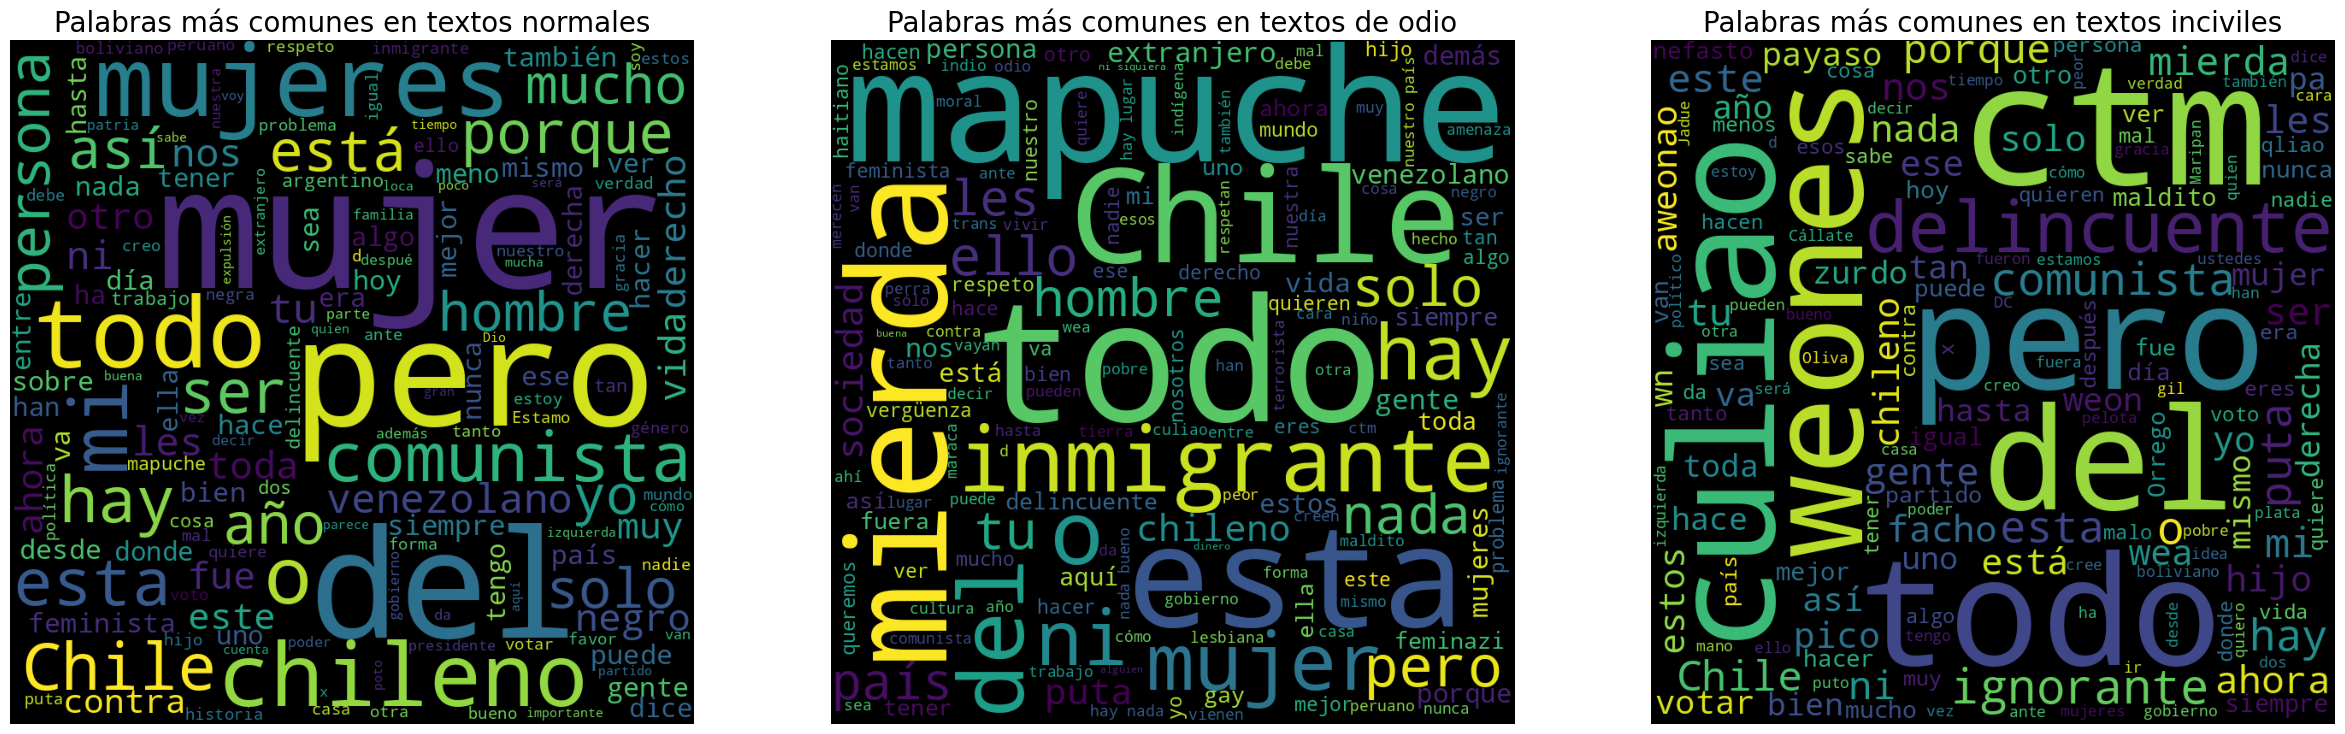

In [ ]:
# Quiero observar las palabras más comunes en cada tipo de texto
import wordcloud
from keras.utils.text_dataset import text_dataset_from_directory
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Lista de stopwords:
stopwords = set(STOPWORDS)
stopwords.update(['y','que','https','el','lo','un','en','la','del'
'tu','las','ya','por','esa','las','eso','qué','sin','su','están','esto'
'es','una','más','mas','tiene','q','t','co','de','para','esto','los','son','con'
'se','le','al','cuando','e','user','como','es','si','tienen','se','con','del'
'pero','sus','te'
])

# Generando la nube de palabras
wordcloud_odio = WordCloud(width=800,height=800,max_font_size=200,
                           max_words=150,stopwords=stopwords
                           ,background_color="black").generate(text_odio)
wordcloud_normal = WordCloud(width=800,height=800,max_font_size=200,
                             max_words=150,stopwords=stopwords,
                             background_color="black").generate(text_normal)
wordcloud_incivilidad = WordCloud(width=800,height=800,max_font_size=200,
                                  max_words=150,stopwords=stopwords,
                                  background_color="black").generate(text_incivilidad)
# Creamos la figura y las subfiguras
fig, axs = plt.subplots(1, 3, figsize=(30, 15))

# Agregamos cada nube de palabras a una subfigura
axs[0].imshow(wordcloud_normal)
axs[0].axis('off')
axs[0].set_title('Palabras más comunes en textos normales',fontsize = 20)
axs[1].imshow(wordcloud_odio)
axs[1].axis('off')
axs[1].set_title('Palabras más comunes en textos de odio',fontsize = 20)
axs[2].imshow(wordcloud_incivilidad)
axs[2].axis('off')
axs[2].set_title('Palabras más comunes en textos inciviles',fontsize = 20)
plt.show()

In [ ]:
# Columna contando las palabras más comunes en cada tipo de texto y agregandolas al dataset en caso de utilizarlas

palabras_a_contar = [
    'mapuche','mierda','mujeres','mujer','culiao','delicuente','weones','puta','inmigrante','venezolano',
    'comunista','feminista','feminazi','ctm','ignorante','facho'
]

for palabra in palabras_a_contar:
    train[palabra] = train['texto'].str.count(palabra)
train.head()

,id,texto,clase,mapuche,mierda,mujeres,mujer,culiao,delicuente,weones,puta,inmigrante,venezolano,comunista,feminista,feminazi,ctm,ignorante,facho
0,12632,ultimo choro se 2018 que delicia,normal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7451,Pero es una realidad para muchas mujeres en Ve...,normal,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,4211,MALDITA SEAS COMUNA DE ÑUÑOA https://t.co/yN4E...,incivilidad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10199,Las tontas de #PautaLibre con el tremendo 🌶🌶 ...,incivilidad,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11597,@user @user @user @user @user Devuelvete y and...,odio,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Balance de clases

En esta sección intentamos balancear el conjunto de datos mediante una función, esto no funciono de la manera que esperamos, por lo que desechamos la idea. Sin embargo, esta el código utilizado:


```
def balancear_dataset(df):
    # Contar la cantidad de tweets por cada clase
    df_clases = df['label'].value_counts()
    # Obtener la cantidad de tweets de la clase con menos tweets
    minimo = df_clases.min()
    # Obtener las clases
    clases = df_clases.index.tolist()
    # Crear un dataframe vacío
    df_balanceado = pd.DataFrame()
    # Iterar sobre las clases
    for clase in clases:
        # Obtener los tweets de la clase actual
        df_clase = df[df['label'] == clase]
        # Obtener una muestra de los tweets de la clase actual
        df_clase = df_clase.sample(n=minimo, random_state=42)
        # Agregar los tweets de la clase actual al dataframe balanceado
        df_balanceado = pd.concat([df_balanceado, df_clase])
    # Mezclar el dataframe balanceado
    df_balanceado = df_balanceado.sample(frac=1, random_state=42)
    return df_balanceado
```

Por lo tanto, decidimos utilizar penalización por peso a la clase mayoritaria en la red neuronal que utilizaremos más adelante.


### El modelo
En primera instancia decidimos utilizar el modelo bert de base, pre entrenado con 100 idiomas distintos, entre ellos el español. Sin embargo, mediante la investigación y posterior implementación de otros modelos decidimos descartarlo.


```
# Nombre del modelo
MODEL_NAME = "bert-base-multilingual-cased"

# Tokenizador del modelo
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
```
El siguiente modelo que probamos fue Beto, el cual tiene la misma arquitectura de un modelo Bert, pero con la diferencia que fue pre-entrenado solo con un corpus en español. Este modelo fue entrenado por miembros del departamento de ciencias de la computación (DCC) de la Universidad de Chile.



```
# Modelo Beto DCC uchile Cased
# Datos de vocabulario y parametros del modelo
!wget https://users.dcc.uchile.cl/~jperez/beto/cased_2M/pytorch_weights.tar.gz
!wget https://users.dcc.uchile.cl/~jperez/beto/cased_2M/vocab.txt
!wget https://users.dcc.uchile.cl/~jperez/beto/cased_2M/config.json
!tar -xzvf pytorch_weights.tar.gz
!mv config.json pytorch/.
!mv vocab.txt pytorch/.

# Nombre del modelo
MODEL_NAME = "pytorch/"

#Tokenizador del modelo
tokenizer = BertTokenizer.from_pretrained("pytorch/", do_lower_case=False)
```

Beto nos dio buenos resultados, pero encontramos un modelo pre entrenado con Tweets de más de 100 idiomas, y esto nos parecio relevante ya que se acercaba más al dataset que tenemos.



In [ ]:
from transformers import AutoTokenizer, AutoModel

# Modelo bert pre entrenado en un corpus de Tweets
MODEL_NAME = 'Twitter/twhin-bert-base'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

>Es importante mencionar que Bert trabaja con los tokens que tiene en su vocabulario. En esta línea, Bert acepta un maximo de 512 Tokens por texto a clasificar.
>
>Dicho esto, nos interesa ver el tamaño de los textos tokenizados para escoger el largo óptimo.

Text(0.5, 0, 'Token count')

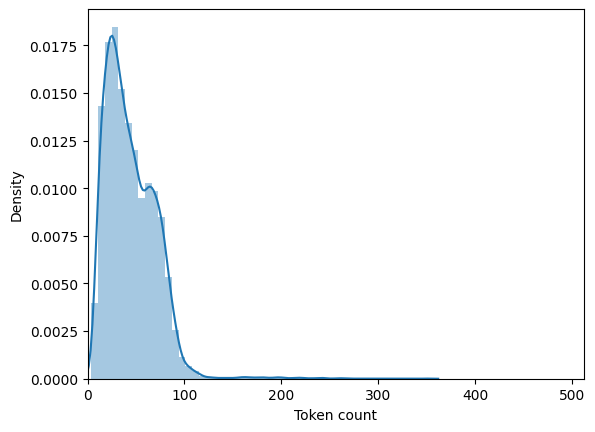

In [ ]:
# Lista que guarda el largo de cada texto del conjunto de datos
token_lens = []

# Iterando dentro del conjunto de datos
for txt in train.texto:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

# Gráfico que muestra la distribución del largo de los textos
sns.distplot(token_lens)
plt.xlim([0, 512]);
plt.xlabel('Token count')

In [ ]:
# Ejemplo tokenización con Bert
sample_txt = 'Queremos quedar primeros para tener un 7 en la competencia'
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print('Frase: ', sample_txt)
print('Tokens: ', tokens)
print('Tokens numéricos: ', token_ids) # Estos son los tokens que recibe el modelo más unos tokens especiales que indican donde prestar atención

Frase:  Queremos quedar primeros para tener un 7 en la competencia
Tokens:  ['▁Queremos', '▁quedar', '▁primeros', '▁para', '▁tener', '▁un', '▁7', '▁en', '▁la', '▁competencia']
Tokens numéricos:  [205820, 38035, 82987, 121, 9574, 51, 361, 22, 21, 100562]


In [ ]:
# Ejemplo de codificación para introducir a BERT
encoding = tokenizer.encode_plus(
    sample_txt,
    max_length = 15, # Este es el máximo óptimo que definimos
    truncation = True,
    add_special_tokens = True, # Estos son los tokens especiales ['<s>'] que indica lo que vamos a clasificar o ['</s>'] indica termino
    return_token_type_ids = False,
    pad_to_max_length = True, #Si el largo es menor a 15 lo rellena con tokens de Padding ['<pad>']
    return_attention_mask = True,
    return_tensors = 'pt'
)
encoding.keys()

print('Lo que recibe el modelo:',tokenizer.convert_ids_to_tokens(encoding['input_ids'][0]))
print('Representación númerica:',encoding['input_ids'][0])
print('A lo que debe prestarle atención:',encoding['attention_mask'][0])



Lo que recibe el modelo: ['<s>', '▁Queremos', '▁quedar', '▁primeros', '▁para', '▁tener', '▁un', '▁7', '▁en', '▁la', '▁competencia', '</s>', '<pad>', '<pad>', '<pad>']
Representación númerica: tensor([     0, 205820,  38035,  82987,    121,   9574,     51,    361,     22,
            21, 100562,      2,      1,      1,      1])
A lo que debe prestarle atención: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])


In [ ]:
# En base al gráfico el largo adecuado es de 300 y el batch size óptimo para no agotar la ram de la gpu
BATCH_SIZE = 32
MAX_LEN = 300

In [ ]:
# Random seed
RANDOM_SEED = 48
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

# Set GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Pre-procesamiento de los datos

Se pensó en eliminar datos como hashtags, menciones, emojis y urls. Sin embargo, los modelos entrenados con este tipo de datos no daban buenos resultados, por lo que se descarto. Aquí el código:


```
def preprocesar_texto(df, columna):
    # Eliminar links
    df[columna] = df[columna].str.replace(r'http\S+', '', case=False)
    # Eliminar menciones
    df[columna] = df[columna].str.replace(r'@\S+', '', case=False)
    # Eliminar hashtags
    df[columna] = df[columna].str.replace(r'#\S+', '', case=False)
    # Eliminar emojis
    df[columna] = df[columna].str.replace(r'\\U\w{8}', '', case=False)
    # Normalizar texto
    df[columna] = df[columna].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    return df
```



In [ ]:
# Etiquetado clases: De texto a número para poder ingresarlas al modelo
clase_dict = {"normal": 0, "odio": 1, "incivilidad": 2}
train["label"] = train["clase"].map(clase_dict)
train.drop("clase", axis=1, inplace=True)
train.head()

NameError: ignored

In [ ]:
# Clase para codificar los datos para el modelo
class GPReviewDataset(Dataset):
    # Constructor Function
    def __init__(self, texto, targets, tokenizer, max_len):
        self.texto = texto
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    # Length magic method
    def __len__(self):
        return len(self.texto)

    # get item magic method
    def __getitem__(self, item):
        texto = str(self.texto[item])
        target = self.targets[item]

        # Codificación
        encoding = self.tokenizer.encode_plus(
            texto,
            add_special_tokens=True,
            truncation = True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'review_text': texto,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [ ]:
# División de entrenamiento para el modelo
# 80% train 10% testeo 10% evaluación

df_train, df_test = train_test_split(train, test_size=0.2, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

print(df_train.shape, df_val.shape, df_test.shape)

(9771, 19) (1221, 19) (1222, 19)


In [ ]:
# Data loader
def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = GPReviewDataset(
        texto=df.texto.to_numpy(),
        targets=df.label.to_numpy(),
        tokenizer=tokenizer,
        max_len=max_len
    )

    return DataLoader(
        ds,
        batch_size=batch_size,
        num_workers=4
    )

In [ ]:
# Create train, test and val data loaders

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
# Numero de textos que se truncan
print('Numero de textos truncado a 300 tokens:\nTrain',end=' ')
print(np.sum(np.array(list(map(lambda x: len(tokenizer.tokenize(x)), df_train["texto"])))>300))
print('Validation:',end=' ')
print(np.sum(np.array(list(map(lambda x: len(tokenizer.tokenize(x)), df_val["texto"])))>300))
print('test:',end=' ')
print(np.sum(np.array(list(map(lambda x: len(tokenizer.tokenize(x)), df_test["texto"])))>300))


Numero de textos truncado a 300 tokens:
Train 1
Validation: 0
test: 0


In [ ]:
# Ejemplos batch_size, Largo_maximo
data = next(iter(train_data_loader))
print(data.keys())

print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

NameError: ignored

In [ ]:
# Build the Sentiment Classifier class
class SentimentClassifier(nn.Module):

    # Constructor class
    def __init__(self, n_classes):
        super(SentimentClassifier, self).__init__()
       # self.bert = BertModel.from_pretrained("pytorch/",return_dict=False) Beto
        self.bert = AutoModel.from_pretrained(MODEL_NAME,return_dict=False)
        self.drop = nn.Dropout(p=0.1) #dropout de la capa de clasificación para evitar overfitting
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes) #Creación de capa de clasificación


    # Forward propagaion class
    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(
          input_ids=input_ids,
          attention_mask=attention_mask
        )
        #  Añadir capa de dropout
        output = self.drop(pooled_output)
        return self.out(output)

In [ ]:
# Inicio del modelo como clasificador de 3 clases
class_names = ['normal','odio', 'incivilidad']

model = SentimentClassifier(len(class_names))
model = model.to(device)
model

Some weights of the model checkpoint at Twitter/twhin-bert-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


SentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(250002, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
              (distance_embedding): Embedding(1023, 64)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
        

In [ ]:
# Número de iteraciones, despues de varios experimentos es el número óptimo
EPOCHS = 3

# Optimizer Adam, ajuste de learning rate y weight_decay manual (VALOR ÓPTIMO)
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=True,weight_decay=1e-2)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)
# Para corregir el desbalance de los datos se penalizara la clase mayoritaria con un peso especifico
class_counts = {0: 4280, 1: 2510, 2: 5424}
total = sum(class_counts.values())
class_weights = [total/class_counts[i] for i in range(len(class_counts))]
class_weights_normalized = [w/sum(class_weights) for w in class_weights]
# Set the loss function
loss_fn = nn.CrossEntropyLoss(weight=torch.FloatTensor(class_weights_normalized).to(device))

In [ ]:
# Peso asignado a cada clase
print('Peso asignado a normal:',class_weights_normalized[0])
print('Peso asignado a odio:',class_weights_normalized[1])
print('Peso asignado a incivilidad:',class_weights_normalized[2])

Peso asignado a normal: 0.2861832313961056
Peso asignado a odio: 0.4879937172810087
Peso asignado a incivilidad: 0.2258230513228857


In [ ]:
# Function de entrenamiento
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train()
    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["targets"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
        )

        _, preds = torch.max(outputs, dim=1)
        loss = loss_fn(outputs, targets)
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())

        # Backward prop
        loss.backward()

        # Gradient Descent
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
# Función de evaluación sobre los datos de validacion, entrega metricas de precisión y perdida
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            # Get model ouptuts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs, dim=1)
            loss = loss_fn(outputs, targets)

            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())

    return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
# Para vaciar la GPU en caso de emergencia
torch.cuda.empty_cache()

### Entrenamiento del modelo

In [ ]:
%%time
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
    # Show details
    print(f"Epoch {epoch + 1}/{EPOCHS}")
    print("-" * 10)

    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(train)
    )

    print(f"Train loss {train_loss} accuracy {train_acc}")

    # Get model performance (accuracy and loss)
    val_acc, val_loss = eval_model(
        model,
        val_data_loader,
        loss_fn,
        device,
        len(df_val)
    )

    print(f"Val   loss {val_loss} accuracy {val_acc}")
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    # If we beat prev performance
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Epoch 1/3
----------
Train loss 0.6408233199439017 accuracy 0.5891599803504176
Val   loss 0.49381642311047286 accuracy 0.8263718263718264

Epoch 2/3
----------
Train loss 0.3966900521000616 accuracy 0.682741116751269
Val   loss 0.45948637487032473 accuracy 0.8501228501228502

Epoch 3/3
----------
Train loss 0.2944163453150419 accuracy 0.715326674308171
Val   loss 0.4763242331070778 accuracy 0.8476658476658477

CPU times: user 24min 55s, sys: 41.8 s, total: 25min 37s
Wall time: 27min 50s


### Resultados entrenamiento

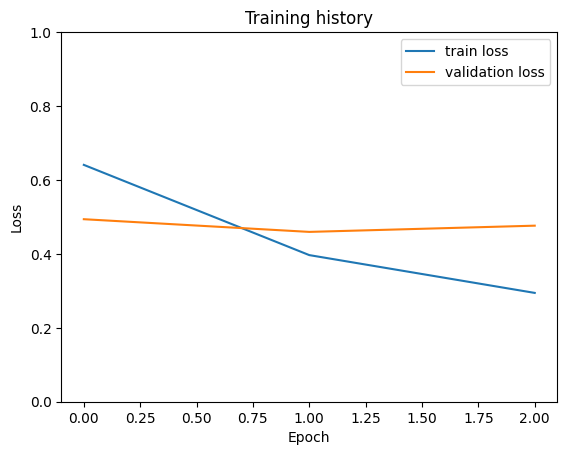

In [ ]:
# Gráfico del error de entrenamiento y de validación en función de las epocas de entrenamiento
# Para evaluar overfitting
plt.plot(history['train_loss'], label='train loss')
plt.plot(history['val_loss'], label='validation loss')

# Graph chars
plt.title('Training history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
# Función para predecir set de testeo y posterior set de target
def get_predictions(model, data_loader):
    model = model.eval()

    review_texts = []
    predictions = []
    prediction_probs = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["review_text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["targets"].to(device)

            # Get outouts
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            _, preds = torch.max(outputs, dim=1)

            review_texts.extend(texts)
            predictions.extend(preds)
            prediction_probs.extend(outputs)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    prediction_probs = torch.stack(prediction_probs).cpu()
    real_values = torch.stack(real_values).cpu()

    return review_texts, predictions, prediction_probs, real_values

In [ ]:
# Predictions on test_data_loader
y_review_texts, y_pred, y_pred_probs, y_test= get_predictions(
    model,
    test_data_loader
)

#### Métricas F1, Recall, precision.

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      normal       0.86      0.82      0.84       465
        odio       0.78      0.80      0.79       253
 incivilidad       0.85      0.87      0.86       504

    accuracy                           0.84      1222
   macro avg       0.83      0.83      0.83      1222
weighted avg       0.84      0.84      0.84      1222



#### Matriz de confusión

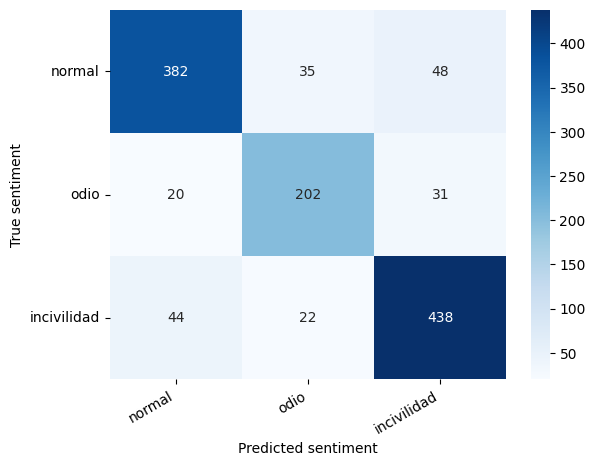

In [ ]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
# Preparando los datos para la funcion evaluate
for index, row in df_test.iterrows():
    if row["label"] == 0:
        df_test.at[index, 'label'] = 'normal'
    elif row["label"] == 1:
        df_test.at[index, 'label'] = 'odio'
    elif row["label"] == 2:
        df_test.at[index, 'label'] = 'incivilidad'
df_test.head()

,id,texto,label
11997,13208,@user @user La diferencia de todo lo que decís...,normal
2566,2162,@user Igual lo primordial es la responsabilida...,incivilidad
2798,6579,"@user ¿alguna gestion, alguna palabra de esto?...",incivilidad
11235,15100,dios odio ser tan auto exigente xq cada vez qu...,incivilidad
5216,5764,"No vengan con esa wevaita de ""no se levantaron...",incivilidad


In [ ]:
learned_labels = np.array(['normal','odio','incivilidad'])
y_probs = np.array(y_pred_probs)

#### Métricas AUC, Kappa y Presicion.

In [ ]:
evaluate(np.array(y_pred_probs), df_test['label'], learned_labels)

Matriz de confusión
[[382  35  48]
 [ 20 202  31]
 [ 44  22 438]]

Reporte de clasificación:

              precision    recall  f1-score   support

      normal       0.86      0.82      0.84       465
        odio       0.78      0.80      0.79       253
 incivilidad       0.85      0.87      0.86       504

    accuracy                           0.84      1222
   macro avg       0.83      0.83      0.83      1222
weighted avg       0.84      0.84      0.84      1222

Métricas:

AUC:  0.948	Kappa: 0.745	Accuracy: 0.836
------------------------------------------------------



array([0.948, 0.745, 0.836])

### Predecir los target set y crear la submission

Aquí predecimos los target set usando los clasificadores creados y creamos los archivos de las submissions.


In [ ]:
# Dataset que deberán predecir para la competencia.
target = pd.read_csv("https://raw.githubusercontent.com/dccuchile/CC6205/master/assignments/new/assignment_1/target/target.tsv", sep="\t")
target.head()


,id,texto,clase
0,3236,@user Chúpame el pico,NaN
1,8185,Marico que ansiedad cuando veo un tweet de Tin...,NaN
2,4804,Yapo weones es solo Melipilla.,NaN
3,12112,@user callate fecal de las manos negras del Sa...,NaN
4,2721,@user Jajajajaja justamente. Otra llegada de a...,NaN


In [ ]:
# Etiquetado clases numerica
clase_dict = {"normal": 0, "odio": 1, "incivilidad": 2}
target["label"] = target["clase"].map(clase_dict)
target.drop("clase", axis=1, inplace=True)
target.head()

,id,texto,label
0,3236,@user Chúpame el pico,NaN
1,8185,Marico que ansiedad cuando veo un tweet de Tin...,NaN
2,4804,Yapo weones es solo Melipilla.,NaN
3,12112,@user callate fecal de las manos negras del Sa...,NaN
4,2721,@user Jajajajaja justamente. Otra llegada de a...,NaN


In [ ]:
# Le entrego un valor a columna label con el fin d poder predecir
target.loc[target['label'].isna(), 'label'] = -1
target.head()

,id,texto,label
0,3236,@user Chúpame el pico,-1.0
1,8185,Marico que ansiedad cuando veo un tweet de Tin...,-1.0
2,4804,Yapo weones es solo Melipilla.,-1.0
3,12112,@user callate fecal de las manos negras del Sa...,-1.0
4,2721,@user Jajajajaja justamente. Otra llegada de a...,-1.0


In [ ]:
#Convertir en data loader para meterlo al modelo
target_data_loader = create_data_loader(target, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
# Predicciones
y_review_texts_target, y_pred_target, y_pred_probs_target, y_test_target= get_predictions(
    model,
    target_data_loader
)



In [ ]:
# Preparando el archivo para la entrega en codalab
incivilidad=pd.Series(y_pred_probs_target[:,2])
odio = pd.Series(y_pred_probs_target[:,1])
normal = pd.Series(y_pred_probs_target[:,0])
entrega=pd.DataFrame()
entrega['id']=target['id']
entrega['normal']=normal
entrega['odio']=odio
entrega['incivilidad']=incivilidad
entrega.head()

,id,normal,odio,incivilidad
0,3236,-1.531518,-1.075869,3.831641
1,8185,1.554775,-1.683662,0.987090
2,4804,-1.333576,-1.545130,3.923675
3,12112,-0.035031,0.002518,0.678183
4,2721,3.001002,-2.257668,-0.360598


In [ ]:
import os
import shutil
# Crear carpeta ./predictions
if not os.path.exists("./predictions"):
    os.mkdir("./predictions")

else:
    # Eliminar predicciones anteriores:
    shutil.rmtree("./predictions")
    os.mkdir("./predictions")

# Guardar predicciones en archivos separados.
entrega.to_csv(
    "./predictions/prediction.txt", sep="\t", header=False, index=False
)

# Crear archivo zip
a = shutil.make_archive("predictions", "zip", "./predictions")

## **7. Resultados**

Algunos de los muchos experimentos que realizamos, con beto, obtuvimos las siguientes métricas:

#### Modelo Beto_DCC

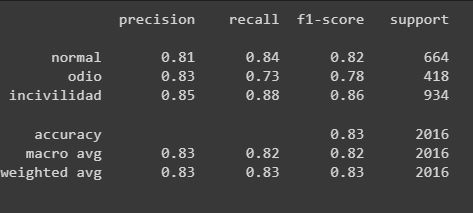

#### Modelo Twitter/twhin-bert-large (Modelo grande con más parametros):

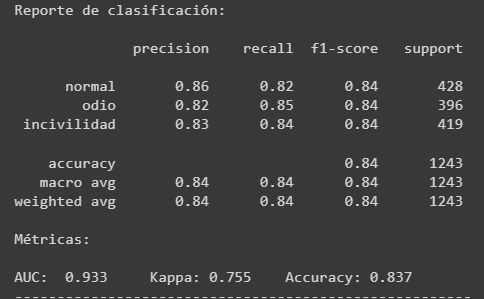

#### Modelo Twitter/twhin-bert-base

Uno de los problemas que estabamos teniendo era el overfitting. Para esto, realizamos varios experimentos variando parametros como learning rate, weight_decay, cantidad de epocas de entrenamiento, ajuste de pesos de la capa de clasificación, etc.

Aquí se observa el problema de overfitting:

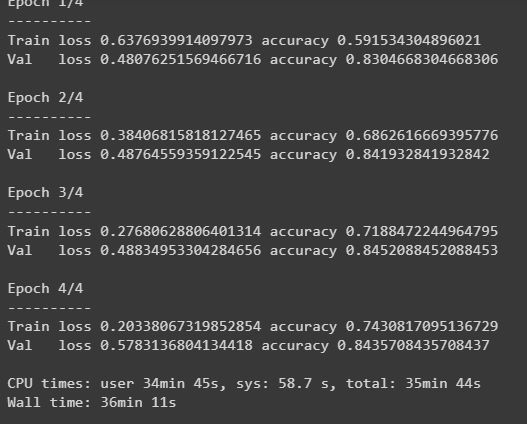

Se puede observar que las epocas óptimas de entrenamiento estan entre 2 y 3.

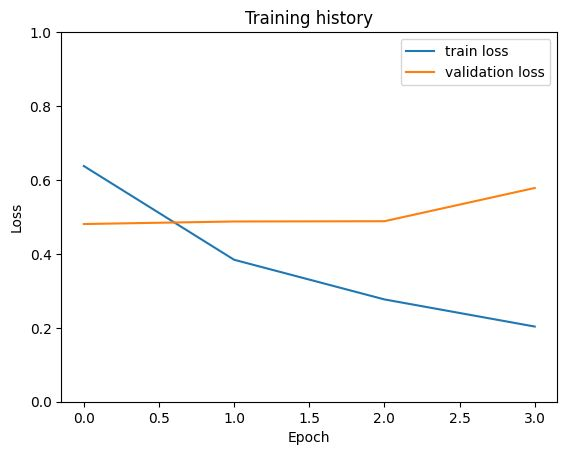

La matriz de confusión:

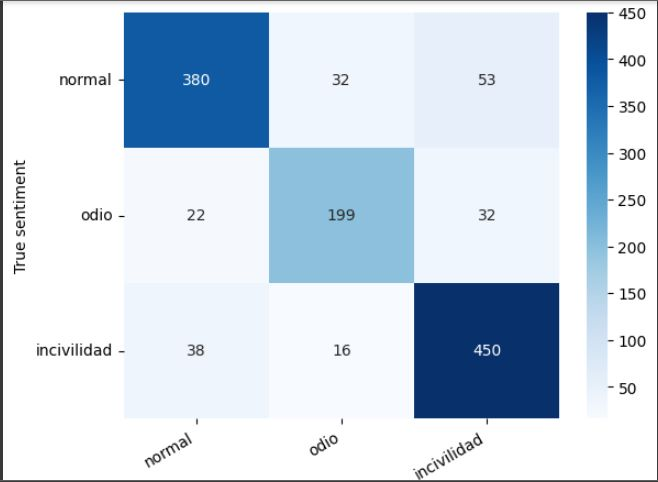

### Modelo Twitter/twhin-bert-base último experimento

El modelo no estaba generalizando de forma correcta, por lo que se ajustaron los parametros, dejandolos de manera óptima para que no hubiera overfitting y obteniendo los resultados del modelo 6 en la tabla (el detalle se puede encontrar en "Resultados de entrenamiento").


| No. | Approach        |               | AUC   | Kappa | Accuracy |
| --- | --------------- | ------------- | ----- | ----- | -------- |
|     | Features        | Clasifier     |       |       |          |
| 1   | None | Bert-base-uncased |0.90 |0.68 |0.78 |
| 2   | None|Bert-base-multilingual-cased  |  0.90     |  0.75     |    0.84      |
|3|Penalización|Beto_DCC|0.92|0.73|0.83|
|4|Balanceo|Twitter/twhin-bert-base|0.93|0.74|0.82|
|5|None|Twitter/twhin-bert-large|0.93|0.76|0.84|
|6|Penalización|Twitter/twhin-bert-base|0.95|0.75|0.84|


## **8. Conclusiones**
En este trabajo, se abordó el problema de la clasificación de textos en español de Chile en tres posibles categorías: normal, odio e incivilidad. Se implementó un modelo pre-entrenado BERT y se llevaron a cabo diversos experimentos para evaluar su rendimiento en la clasificación de los textos. Se observó la importancia de la optimización del modelo para evitar overfitting y se presentaron los resultados obtenidos.

Durante la investigación, se evidenció que la disponibilidad de datos en español de Chile era limitada, lo que limitó la capacidad de entrenamiento del modelo. Por lo tanto, se sugiere como trabajo futuro la creación de un dataset recopilando información de Twitter. Asimismo, se reconoce que el modelo puede tener limitaciones en relación a las características específicas del idioma español de Chile.

En conclusión, el modelo implementado demostró ser útil para la clasificación de textos en español de Chile en tres categorías, pero se sugiere continuar investigando y mejorando el modelo en futuros trabajos. Se considera que este proyecto ha permitido una mayor comprensión de la importancia de la optimización de modelos y de la necesidad de disponer de suficientes datos para el entrenamiento efectivo de modelos de clasificación de texto.